# Netfilx Stock Analysis

Dataset Link : https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction

### Objective:-
- Gain a comprehensive understanding of Netflix's stock performance.
- Assess trends, volatility, and trading patterns.
- Determine if the stock price exhibits autocorrelation, seasonality, stationarity or other time series characteristics
- Analyze the distribution of Netflix stock returns to understand the range of potential outcomes.
- Evaluate the effectiveness of an ARIMA model in price prediction.
- To use the findings of the analysis to make informed investment decisions.

### Libraries :-

- **pandas**: Used for data manipulation and organization.
- **seaborn and matplotlib.pyplot**: For data visualization and creating meaningful plots.
- **statsmodels**: Facilitates statistical tests and time series modeling.
- **warnings**: Helps manage and suppress warning messages during analysis.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

# To ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the data file using pandas
df = pd.read_csv("NFLX.csv")
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800


**Explanation of Columns**:

1. **Date:** The date of each trading day.
2. **Open:** The opening price at the beginning of the day.
3. **High:** The highest price reached during the day.
4. **Low:** The lowest price reached during the day.
5. **Close:** The closing price at the end of the day.
6. **Adj Close:** The adjusted closing price, accounting for corporate actions such as dividends and stock splits
7. **Volume:** The total number of shares traded on that day.

These columns provide detailed information about Netflix stock prices and trading activity.

In [73]:
df.shape

(1009, 7)

**Interpretation** : dataset contains information for 1009 trading days and 7 columns

In [74]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


**Interpretation** : Non-null counts confirm no missing data.

In [76]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Interpretation** : No missing values in any columns.

# Descriptive Statistics

In [77]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


**Observation:**
- Count: dataset consists of 1009 data points, indicating that it covers 1009 trading days.
- Mean (Average): Opening, closing, and adjusted closing prices averaged around 419, with a high of 425 and a low of 412. Daily trading volume averaged 7.57 million shares.
- Standard Deviation (Std) :
    - The opening price's high Std of 108 compare to mean indicating greater price volatility at the beginning of trading sessions.
    - Std 109 for the high price indicates larger daily price swings
    - Std 107 for the lowest price denotes there are days when the stock's price drops significantly lower than the average low price.
    - Closing Std 108 hints at trading fluctuations
    - Adj Close: Std 108 reveals days of notable stock price swings, influenced by events like dividends and stock splits
    - Volume Std 5.47M shares means that there can be days with significantly more or fewer shares traded compared to the average
- Price Range and Distribution:
    - min & max values reveal the lowest and highest prices observed.
    - quartiles (25th, 50th, and 75th percentiles) provide insights into the distribution of prices, helping us identify where most of the data points cluster.
- Trading Volume Activity: Min Max shows least and most trading volume. Quartiles help identify where a considerable portion of trading days is concentrated in trading volume.

# Time Series Analysis

### Data Preparation

We need to ensure that the "Date" column is in a datetime format and set it as the index.

In [3]:
#  Data Type of Date column was object but after using to_datetime(), it will convert to datetime object.
df['Date'].head(2)

0    2018-02-05
1    2018-02-06
Name: Date, dtype: object

### to_datetime()   :-
When a csv file is imported and a Data Frame is made, the Date time objects in the file are read as a string object 
rather a Date Time object and Hence it’s very tough to perform operations like Time difference on a string 
rather a Date Time object. Pandas to_datetime() method helps to convert string Date time into Python Date time object.

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

df['Date'].head(2)

0   2018-02-05
1   2018-02-06
Name: Date, dtype: datetime64[ns]

**Observation** : Datatype change from object to datetime

#### currently index is 0,1,2... We want to make Date column as index

In [5]:
# Set the "Date" column as the index
df.set_index('Date', inplace=True)

df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800


### Visualizing Time Series Data 

### Plot Netflix OHLC & Adj Close prices

We will create line plots to visualize the Netflix Stock Price Trends 2018-2022

[Text(0.5, 1.0, 'Netflix Stock Prices Over Time'), Text(0, 0.5, 'Price')]

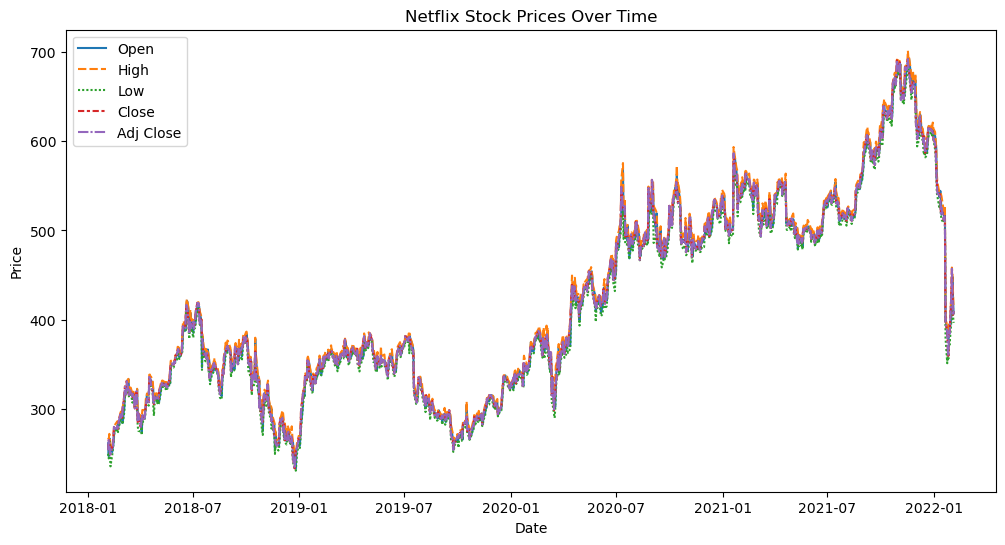

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[['Open', 'High', 'Low', 'Close', 'Adj Close']]).set(
    title="Netflix Stock Prices Over Time", ylabel="Price")

**Observation** :
- The overall trend of the Netflix stock price over time has been up. This is evident from the fact that the line is generally sloping upwards.
- There have been a number of periods of volatility in the Netflix stock price over time. These periods of volatility are characterized by sharp increases and decreases in the stock price.
- The Netflix stock price has been on a downward trend since late 2021.

### Stock Trading Volume Over Time

[Text(0.5, 1.0, 'Netflix Stock Volume Over Time')]

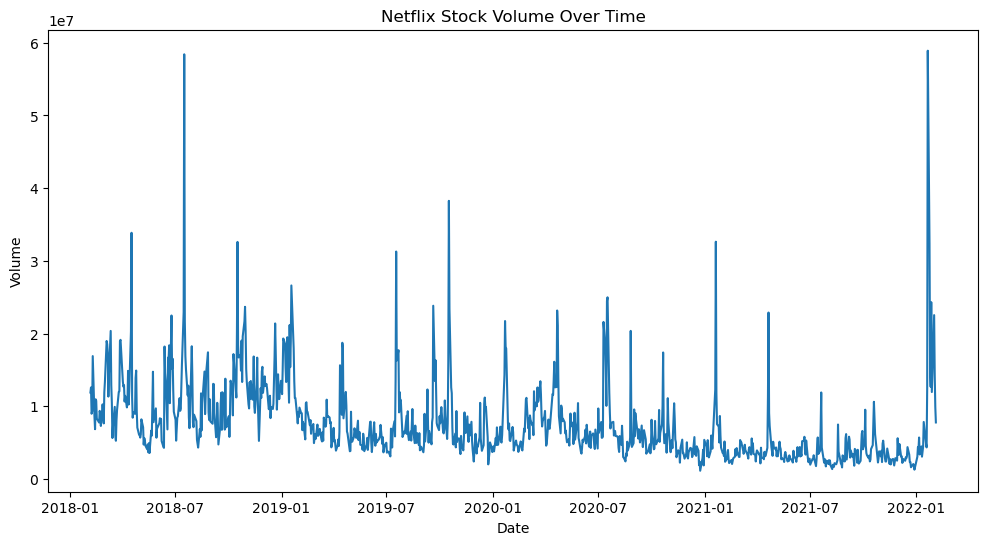

In [14]:
# Plot Volume

plt.figure(figsize=(12, 6))

sns.lineplot(data=df['Volume']).set(title="Netflix Stock Volume Over Time")

**Observation**
- The overall trend of the Netflix stock trading volume over time has been down. This is evident from the fact that the line is generally sloping downwards.
- There have been a few spikes in the trading volume over the past few years. These spikes may be due to major news events, such as the release of a new Netflix show or the announcement of a new partnership.
- The trading volume has been relatively low in recent months. This suggests that there is less investor interest in Netflix stock at the moment.

# Statistical Tests for Time Series Stationarity and Trend Detection
Understand the behaviour of stock price. Figure out reason behind stock price fluctuations.

# ADF (Augmented Dickey-Fuller) Test
Determine data is stationary or non-stationary. The ADF test checks whether a unit root is present in the data, which is indicative of non-stationarity.
- Stationary Data - Constant Mean, Variance, Autocorrelation.No Seasonal Patterns, No Trends
- Non Stationary Data - Changing Mean, Variance, Time-Dependent Autocorrelation. Seasonal Patterns, long-term trends.

In ADF Test:

- Test Statistics < Critical Value it means Data is Staionary else non stationary.

- Null Hypothesis - if probability value (p-value) less than 5% (0.05) significance level- Data is Stationary ( additive decomposition )

- Alternate hypothesis - if p-value is greater than the 5%(0.05) significance level- Data is Not Stationary ( multiplicative decomposition )

In [22]:
import statsmodels.api as sm

# Using the AIC Criterion for Lag Selection
sm.tsa.adfuller(df['Close'], autolag='AIC')

(-1.8125906878289952,
 0.37422892568207605,
 6,
 1002,
 {'1%': -3.436893045520188,
  '5%': -2.8644287878535146,
  '10%': -2.568308127138936},
 7545.926742057859)

Code Explain:
- sm.tsa : Time Series Analysis module within the Statsmodels library
- adfuller() : to perform ADF test on data
- autolag='AIC' : Selecting the number of lags in the ADF test. 'AIC' stands for Akaike Information Criterion, a method for model selection. The AIC method helps determine the optimal number of lags in the test to obtain more reliable results.

Output Explain :
- adf_statistic :  test statistic calculated during the test. The more negative the test statistic, the stronger the evidence against the presence of a unit root and the more likely the data is stationary.
- p_value : 0.374, which is greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is evidence of non-stationarity in the data.
- used_lag : number of lags used in the test
- n_observation : number of observations (data points) in the time series
- critical_values : dictionary containing critical values at different significance levels (e.g., 1%, 5%, 10%)
- Maximized Information Criterion (7545.926742057859) : used for model selection. Lower values indicate a better fit.

**Obervation** : High p-value (≈0.374) suggests possible non-stationarity. Therefore, based on this test, there is evidence to suggest that the stock price data is not stationary and likely exhibits non-stationary characteristics, such as trends or seasonality.

# KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test
- Determine the stationarity of a time series data set
- This test checks for the presence of a deterministic trend in the data, which is indicative of non-stationarity.

In KPSS Test: If p-value is less than a significance level (0.05) - Data is Non-Stationary. Else Data is Stationary

In [20]:
import statsmodels.api as sm

# Using the Constant and Trend Regression (ct)
sm.tsa.kpss(df['Close'], regression='ct')

(0.5299111452478679,
 0.01,
 19,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

Output Explain : 
- Test Statistic 0.5299 higher compare to Critical value. suggests that the data is non-stationary
- P-Value : 0.01 less than 0.05 significance level. Evidence of non-stationarity in the data.
- Lag : 19 number of lags used in the test

**Observation** : KPSS test indicates stock price data is not stationary. And likely exhibits non-stationary characteristics, such as a deterministic trend.

# Variance Test
- Since the ADF and KPSS Test confirm the data is non-stationary (not stable), now let's figure out whether the stock prices fluctuations are due to seasonal patterns or if there's a more extended trend behind these price changes.

- variance is measure of how data points are spread around the mean value
- We will decompose the time series data into its components to identify trends, seasonality, and residuals.
- This test is to compare the variance of seasonal component with the trend component

**Decomposition**
is a statistical technique used to break down a time series data set into below components. 
- Trend: overall direction in which the data is moving
- Seasonal: regular, recurring patterns or cycles in the data
- Residual (or Error): random fluctuations or noise in the data that cannot be attributed to the trend or seasonal patterns.

goal is to isolate and analyze these components separately to gain insights into the structure of the data

In [6]:
import statsmodels.api as sm

# Perform seasonal decomposition with yearly pattern
decomposition = sm.tsa.seasonal_decompose(df['Close'], period=365)

### Variance of the Seasonal Component

In [7]:
# Calculate the variance of the seasonal components
decomposition.seasonal.var()

1079.9201143757848

**Interpretation**: variance is relatively low, suggesting that the seasonal pattern does not contribute substantially to the overall variability in the data.

### Variance of the Trend Component

In [8]:
# Calculate the variance of the trend components
decomposition.trend.var()

5360.714214839641

**Interpretation**: variance is substantially higher than the seasonal variance, indicating that the long-term trend contributes more to the overall variability in the data than the seasonal pattern.

### Ratio of Seasonal Variance to Trend Variance

In [9]:
# Calculate the ratio of seasonal variance to trend variance
decomposition.seasonal.var() / decomposition.trend.var()

0.20145079015522363

**Observation**:
Small ratio suggests that Stock Price is primarily influenced by the long-term trend while seasonal patterns have a relatively minor impact

### Visualize the Decomposition

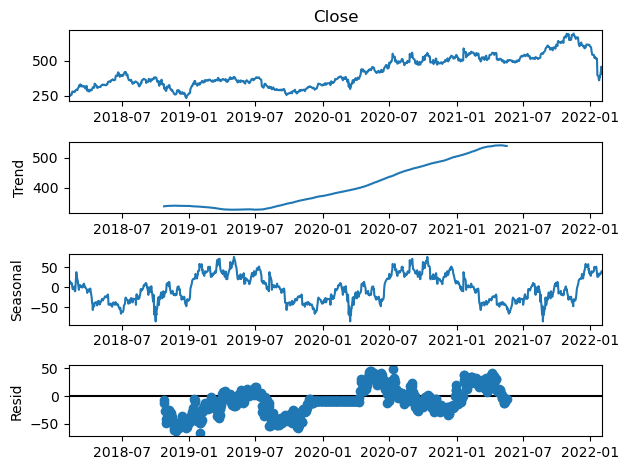

In [10]:
decomposition.plot()
plt.show()

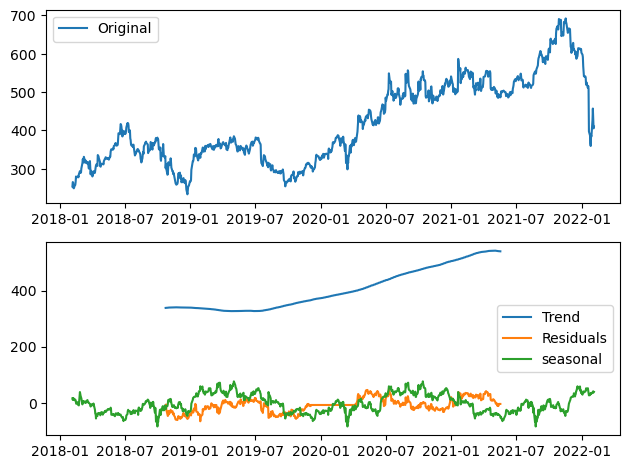

In [11]:
plt.subplot(211)
plt.plot(df['Close'], label='Original')
plt.legend()

plt.subplot(212)
plt.plot(decomposition.trend, label='Trend')
plt.plot(decomposition.resid, label='Residuals')
plt.plot(decomposition.seasonal, label='seasonal')
plt.legend()

plt.tight_layout()
plt.show()

**Observation**: In the visuals, the Seasonal and Residual components exhibit minimal fluctuations around zero, while the Trend looks a lot like the original data. This suggests that the Stock price is predominantly influenced by long-term pattern it follows. Other short-term fluctuations don't seem to have as big impact on the stock's overall direction.

# Analyzing Stock Price Trends with Moving Averages
Understand the trend and direction of the stock price. We will take the average of last 50 days of Stock Price and average of  last 200 days to compare it with over all average of stock price and determine whether the stock is generally going up, down, or staying steady.

### Calculate 50-day and 200-day moving averages

In [76]:
# Utilizing Rolling Windows
df['50-day MA'] = df['Close'].rolling(window=50).mean()
df['200-day MA'] = df['Close'].rolling(window=200).mean()

### Calculating the Mean of Stock Prices

In [86]:
df['Close'].mean()

419.0007329207136

**Interpretation**: on average the closing prices of the stock to be around 419 dollar.

### last 50-day Moving Average of Stock Price

In [84]:
df['50-day MA'].iloc[-1]

549.5154009800001

**Interpretation**: Last 50 trading days of average closing price(549) is higher than the mean(419) indicates that the recent stock prices have been trending higher compared to the overall average.

### last 200-day Moving Average of Stock Price

In [89]:
df['200-day MA'].iloc[-1]

558.141148245

**Interpretation**: The 200-day moving average being higher than both the mean and the 50-day moving average implies a more extended upward trend in the stock's price.

**MA Conclusion** :  Both the 50-day and 200-day moving averages suggest a generally positive trend in the stock's performance, with recent prices trending higher than the long-term average.

### Visualizing Moving Averages for Netflix Stock

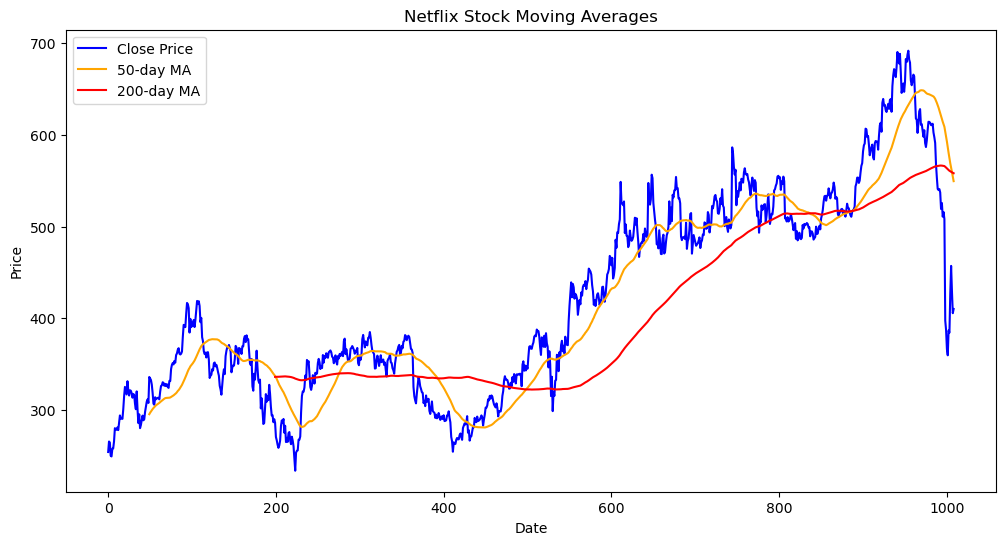

In [77]:
# Plot moving averages
plt.figure(figsize=(12, 6))
plt.title("Netflix Stock Moving Averages")
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['50-day MA'], label='50-day MA', color='orange')
plt.plot(df.index, df['200-day MA'], label='200-day MA', color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

**Interpretation from Visual**
- The **50-day moving average** is a short-term moving average that is used to identify short-term trends in the market. The fact that the 50-day moving average is above the 200-day moving average suggests that Netflix stock is in a short-term uptrend.
- The **200-day moving average** is a long-term moving average that is used to identify long-term trends in the market. The fact that the 50-day moving average is above the 200-day moving average also suggests that Netflix stock is in a long-term uptrend.
- The **upward trend in the 50-day moving average** suggests that the stock price is likely to continue to rise in the near future.

Overall, the chart is bullish for Netflix stock. It suggests that the stock is in a short-term and long-term uptrend, and that the stock price is likely to continue to rise in the near future.

# Analyzing Daily Returns
Exploring the Distribution and Statistical Properties of Daily Returns

Daily Returns Percentage = (Today’s Closing Price − Yesterday’s Closing Price) / Yesterday’s Closing Price

pct_change() - it calculate the percentage change from one day to the next.

### Descriptive Statistics for daily returns

In [22]:
df['Daily Returns'] = df['Close'].pct_change()

df['Daily Returns'].describe()

count    1008.000000
mean        0.000831
std         0.026603
min        -0.217905
25%        -0.011933
50%         0.000673
75%         0.014544
max         0.168543
Name: Daily Returns, dtype: float64

**Observation** :
- The mean daily return is approximately 0.000831, suggesting that, on average, the stock experiences a small positive return each day.
- The standard deviation of daily returns is approximately 0.0266, indicating moderate volatility in daily price movements. 
- The data ranges from a minimum daily return of -0.217905 to a maximum of 0.168543, depicting significant price fluctuations.
- The 25th and 75th percentiles are -0.011933 and 0.014544, signifying the lower and upper bounds of typical daily returns.

### Determining Confidence Bounds for Netflix Daily Returns
Calculating Lower and Upper Bounds

In [17]:
import numpy as np

# Calculate the z-score for 'Daily Returns'
mean_returns = df['Daily Returns'].mean()
std_returns = df['Daily Returns'].std()
z_scores = (df['Daily Returns'] - mean_returns) / std_returns

# Define the significance level (e.g., 95% confidence interval)
alpha = 0.05

# Calculate the lower and upper bounds based on z-score
lower_bound = mean_returns + z_scores.quantile(alpha/2) * std_returns
upper_bound = mean_returns + z_scores.quantile(1 - alpha/2) * std_returns

print("\nLower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -0.05335118663198278
Upper Bound: 0.05363785040035485


**Interpretation** : most of the daily returns are expected to fall within the range of approximately -0.05% to 0.05% with a 95% confidence level.

### Visualize the distribution of daily returns
Create a histogram and kernel density estimate (KDE) plot

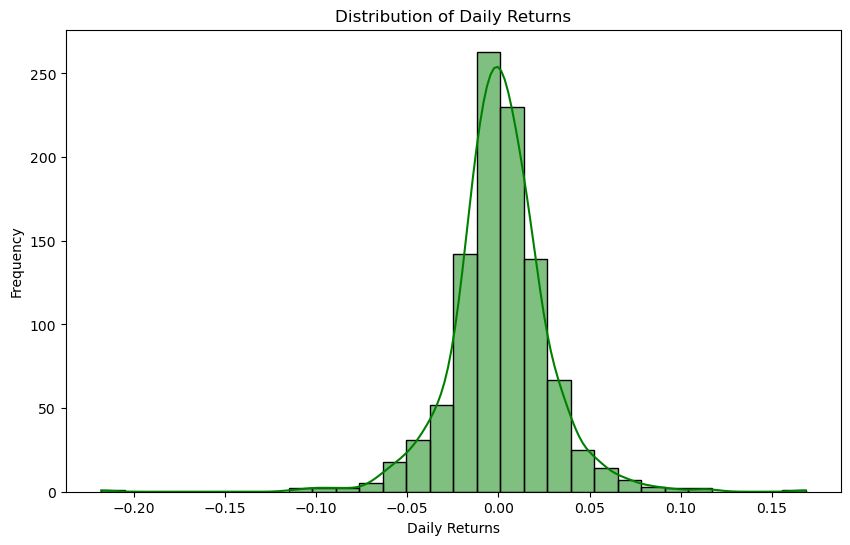

In [90]:
# Plot the distribution of daily returns
plt.figure(figsize=(10, 6))

sns.histplot(data=df['Daily Returns'].dropna(), bins=30, kde=True, color='green')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()

**Observation**:
- histogram shows that the distribution of daily returns is approximately normal(bell-shaped curve).
- The shaded area under the curve represents the 95% of the daily returns that are expected to fall between -0.05% to 0.05%.
- The overall shape of the histogram suggests that the Netflix stock price is a volatile stock with a lot of variation in its daily returns. However, the fact that the distribution of daily returns is approximately normal suggests that the stock price is likely to revert to its mean over the long term.
- In other words, the stock price is likely to spend most of its time within a narrow range of prices, but there is a small but significant chance that the stock price could move outside of this range on any given day.

# Autocorrelation and Partial Autocorrelation
To understand and predict how stock prices move over time. Relationships between past and present observations.

**Autocorrelation function (ACF)** : looking at how similar today's price relates to past prices.  if a stock price of today is closely related to its price from the previous day that's a positive autocorrelation. It suggests that recent stock prices are influencing today's price.

**Partial autocorrelation function (PACF)** :  figure out which specific past days are the most important in predicting tomorrow's stock price. For example, price today is somewhat related to its price from two days ago, but not as much to the price from three days ago. PACF helps you focus on that direct relationship with the price from two days ago, ignoring the less influential connections. PACF helps pinpoint the specific past days that have the strongest influence on future prices.

### Exploring Autocorrelation in Netflix Stock Price Data

In [42]:
import statsmodels.api as sm

sm.tsa.acf(df['Close'], nlags=40)

array([1.        , 0.99364294, 0.98797183, 0.98213035, 0.97608209,
       0.96964913, 0.96410316, 0.95908732, 0.95445755, 0.9500389 ,
       0.94535315, 0.94090738, 0.93666127, 0.93176213, 0.92682068,
       0.92152382, 0.91684296, 0.91156261, 0.9066042 , 0.9011441 ,
       0.89625   , 0.8919252 , 0.8875299 , 0.88371846, 0.8797761 ,
       0.87571086, 0.87127137, 0.86681431, 0.86224957, 0.85824708,
       0.853767  , 0.8495962 , 0.84543689, 0.84100189, 0.83580142,
       0.83126111, 0.82584774, 0.8205642 , 0.81489915, 0.80861769,
       0.8025123 ])

**Interpretation**:
- lag 0 correlation with itself, which is always 1. because a time series is perfectly correlated with itself at the same time.
- At lag 1 value is 0.99 indicating a very high positive correlation between the current value and the previous value.
- As you move to higher lags values gradually decrease indicating that the correlation between the current value and values at longer lags decreases.
- However, even at higher lags, there is still some level of correlation, which suggests that there may be some potential patterns or trends in the data.

### Partial Autocorrelation for Netflix Stock Price Data

In [62]:
# Calculate the partial autocorrelation and format the values in decimal form

import statsmodels.api as sm

sm.tsa.pacf(df['Close'], nlags=30)

print(['{:.4f}'.format(value) for value in sm.tsa.pacf(df['Close'], nlags=30)])

['1.0000', '0.9946', '0.0605', '-0.0153', '-0.0247', '-0.0422', '0.0758', '0.0589', '0.0400', '0.0182', '-0.0356', '0.0163', '0.0258', '-0.0531', '-0.0066', '-0.0399', '0.0550', '-0.0433', '0.0156', '-0.0521', '0.0326', '0.0649', '-0.0026', '0.0531', '-0.0235', '-0.0217', '-0.0266', '-0.0009', '0.0004', '0.0625', '-0.0499']


**Interpretation**:
stock price is strongly autocorrelated at lag 1 and weakly autocorrelated at lag 2. There is no significant autocorrelation at lags 3 through 90.

- Lag 1 PACF is 1.0, as the series is perfectly correlated with itself at lag 1.
- Lag 2 PACF is 0.9946, indicating a very high correlation between the series at t and t-2.
- Most other PACF values are small in magnitude, indicating low partial autocorrelations.
- There are a few higher values like lag 6, 36, 89 indicating some autocorrelation at those lags.
- Overall this suggests 90 days PACF has high autoregression at short lags but little autocorrelation at longer lags.

### Visualization of ACF & PACF Patterns for In-Depth Time Series Analysis

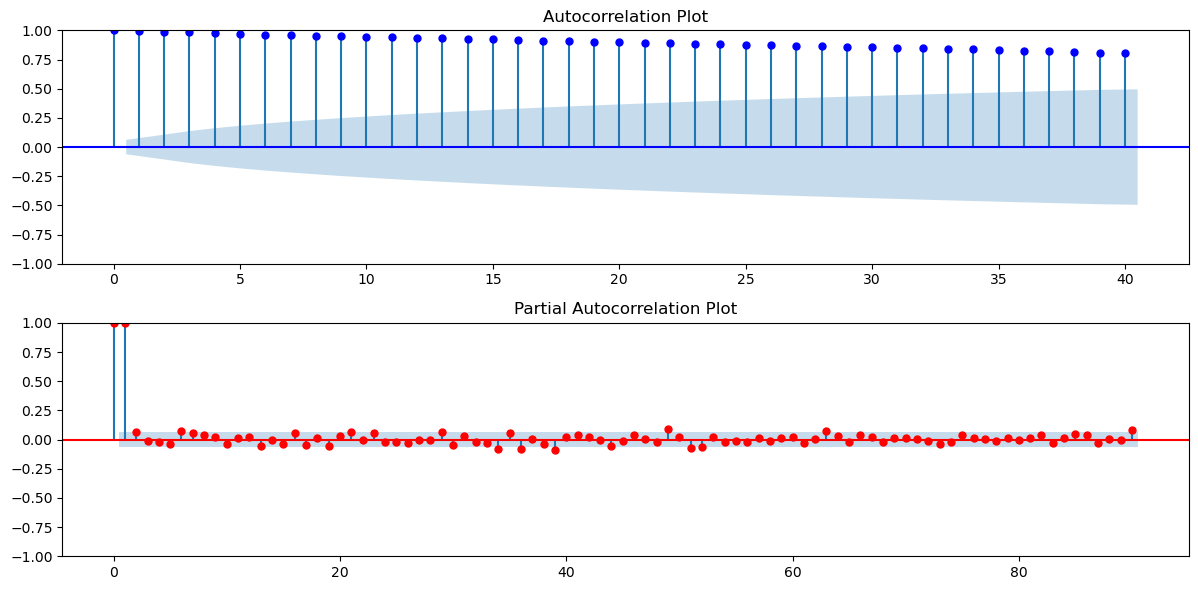

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation and partial autocorrelation plots
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['Close'], lags=40, ax=plt.gca(), color='blue')
plt.title("Autocorrelation Plot")

plt.subplot(212)
plot_pacf(df['Close'], lags=90, ax=plt.gca(), color='red')
plt.title("Partial Autocorrelation Plot")

plt.tight_layout()
plt.show()

**Observations**:
- The ACF plot shows that the autocorrelations are high for the first few lags. This suggests that the time series has a significant autoregressive component.
- ACF shows that the stock price is positively autocorrelated at lags 1 through 5. This means that the stock price is likely to continue to move in the same direction as it did in the previous day or days.
- However, the correlation at lags 6 through 40 is very small, indicating that there is no significant autocorrelation at these lags.
- The PACF plot shows that the partial autocorrelations are significant for the first two lags. This suggests that the time series has a significant moving average component.
- PACF shows that the stock price is only significantly autocorrelated at lag 1.
- PACF suggests that the Netflix stock price is a trending stock with a positive autocorrelation at lag 1. This means that the stock price is likely to continue to move in the same direction as it did in the previous day.
- However, it is important to note that autocorrelation does not guarantee future performance. The stock price could still move in the opposite direction of its trend at any time.

# Time Series Forecasting

We will start by using a simple ARIMA model for time series forecasting.

**ARIMA** (AutoRegressive Integrated Moving Average) model - used to forecast time series data.

It is based on the assumption that the current value of a time series is influenced by its own past values and by the past values of some other time series.

ARIMA models are defined by three parameters: p d q
- AR indicated by p (order of autoregression) which represents how many past values are used to predict the current value. captures the influence of past values on the current value.
- I indicated by d (degree of differencing) applied to make the series stationary. It represents how many times you need to difference the data.(i.e., the number of non-seasonal differences). removes any trend or seasonality from the data.
- MA indicate by q (order of moving average) which represents how many past forecast errors are used to predict the current value. captures the influence of past errors on the current value.

p, d, q need value in stationary form to predict the stock price. It means mean, variance, and autocorrelation, remain relatively constant over time

### Check the Data Stationarity
- We figured that data is non stationary confimed by ADF, KPSS, Variance Test.
- Let check the stationarity of Mean and std

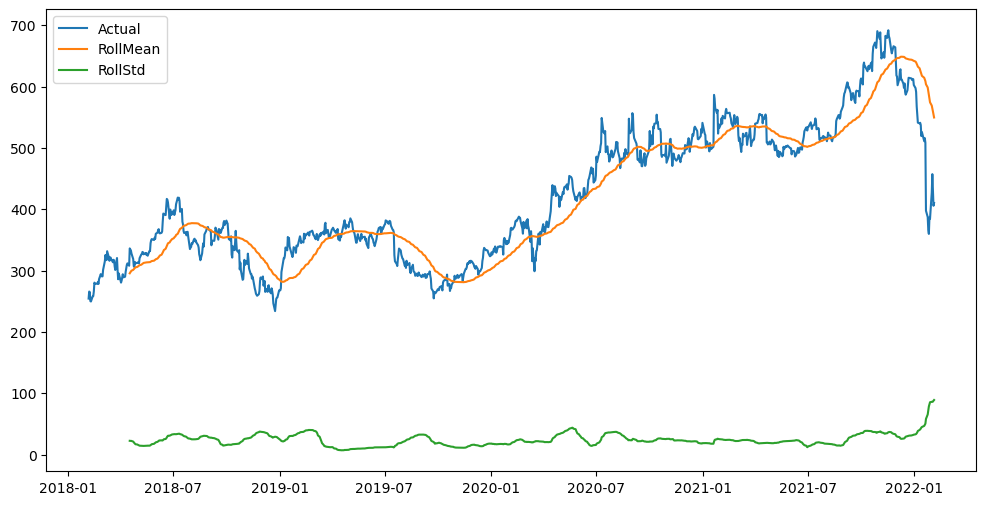

In [6]:
# Utilizing Rolling Windows
df['RollMean'] = df['Close'].rolling(window=50).mean()
df['RollStd'] = df['Close'].rolling(window=50).std()

plt.figure(figsize=(12, 6))

plt.plot(df['Close'])
plt.plot(df['RollMean'])
plt.plot(df['RollStd'])

plt.legend(['Actual', 'RollMean', 'RollStd'])
plt.show()

**Observation**
- Rolling Mean showing Trending Patterns. Non Stationary.
- Rolling Std is Constant it means it is stationary.

# Making Data Stationary to determine the value to p, d, q

- Method such as Time Shift, Log, Square Root, Cube Root provide value of d
- ACF Test provide value to Q and PACF gives value of p.
- We will start by Time Shif i.e differencing method

### Time Shift method will give the value of d
- shift the data to one interval using shift() and difference the actual data with shifted data.
- Check the stationary and decide whether this method make the data stationary.
- same operation can be achived by diff() function

In [7]:
# Time Shift

price = df[['Close']].copy()

price['Shift_Diff'] = price - price.shift()

price.head(3)

,Close,Shift_Diff
Date,,
2018-02-05,254.259995,NaN
2018-02-06,265.720001,11.460006
2018-02-07,264.559998,-1.160003


### Now let's check the stationarity of time shifted data

(-14.242275992929105, 1.530402275429928e-26, 5, 1002, {'1%': -3.436893045520188, '5%': -2.8644287878535146, '10%': -2.568308127138936}, 7538.112957279606)
P Value : 0.000000000000000000000000015304


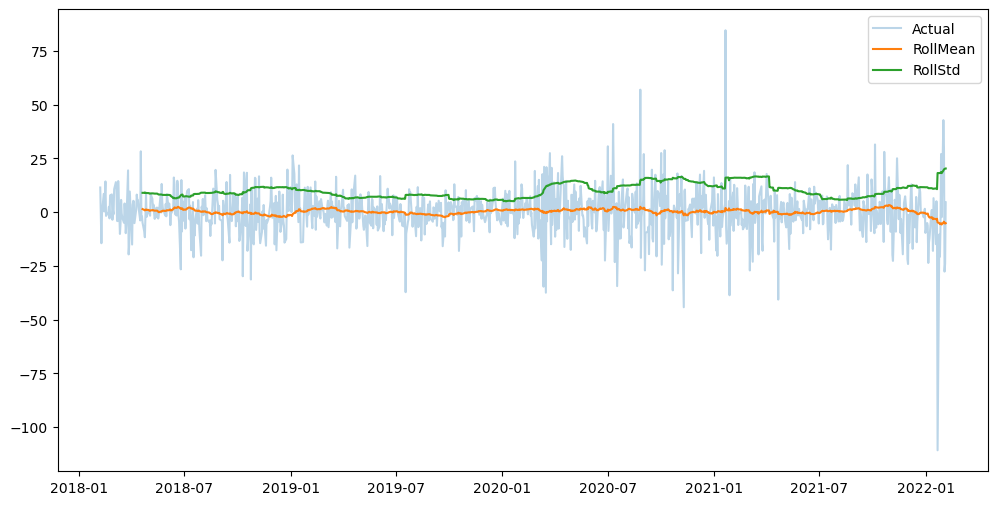

In [9]:
#del df_test # delete variable in case existed

df_test = price.copy()  # copy the time shift dataframe

# ADF Test
print(sm.tsa.adfuller(df_test['Shift_Diff'].dropna(), autolag='AIC'))
print('P Value : ' + '{:.30f}'.format(sm.tsa.adfuller(price['Shift_Diff'].dropna(), autolag='AIC')[1]))

# Rolling Window Test
# Utilizing Rolling Windows
df_test['rm'] = df_test['Shift_Diff'].rolling(window=52).mean()
df_test['rs'] = df_test['Shift_Diff'].rolling(window=52).std()
plt.figure(figsize=(12, 6))
plt.plot(df_test['Shift_Diff'],alpha=0.3)
plt.plot(df_test['rm'])
plt.plot(df_test['rs'])

plt.legend(['Actual', 'RollMean', 'RollStd'])
plt.show()

**Interpretation**
- Now the data is stationary. Static values are less than critical values and P value is less than 0.05
- In Visual chart we can see that Rolling Mean and Rolling Std are stable at around 0 value.
- Since the fist order of differencing makes the data stationary so value d = 1

### We can also determine the number of Differencing using ndiffs

In [152]:
# pip install pmdarima

from pmdarima.arima.utils import ndiffs

ndiffs(df.Close, test='adf')

1

**Interpretation** : one difference required. We will use d = 1

### PACF test on Differencing value to determin value of p

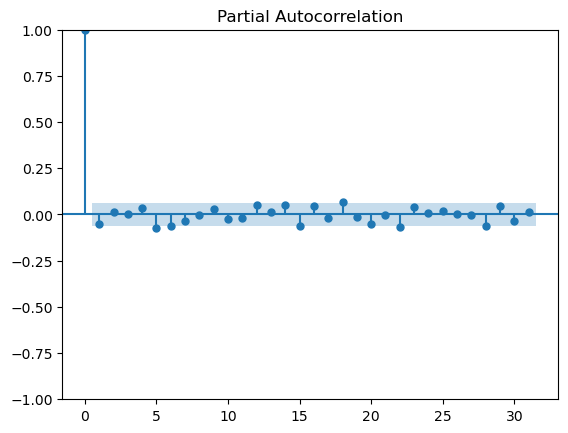

In [13]:
# since d is fist order of differencing
diff = df.Close.diff().dropna()

#diff.plot()
plot_pacf(diff)
plt.show()

### ACF test on Differencing value to determin value of q

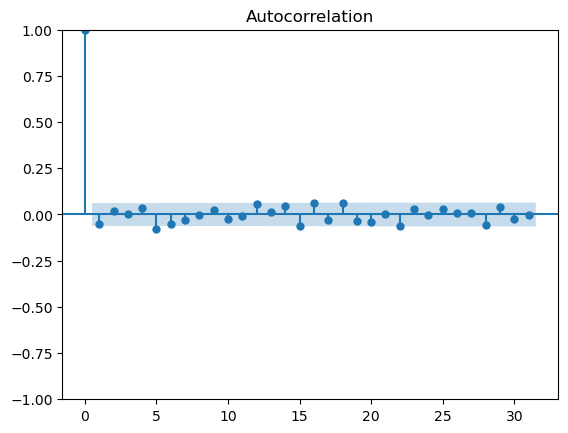

In [166]:
# since d is fist order of differencing
diff = df.Close.diff().dropna()

#diff.plot()
plot_acf(diff)
plt.show()

### Alternate way to find p, d, q using AIC Akaike Information Criterion

In [125]:
import itertools

order=[]
maic=[]

p= range(0,5)
q= range(0,5)
d= range(0,2)

pdq = list(itertools.product(p,d,q))

for param in pdq:
    try:
        model_arima = sm.tsa.arima.ARIMA(df['Close'],order=param)
        model_arima_fit = model_arima.fit()
        #print(param,model_arima_fit.aic)
        order.append(param)
        maic.append(model_arima_fit.aic)
    except:
        continue
        
# Check lowest value of AIC
pd.DataFrame(maic, order, columns=['AIC']).sort_values(by='AIC').head()

,AIC
"(3, 1, 3)",7702.832762
"(3, 1, 2)",7702.982101
"(2, 1, 4)",7704.402958
"(1, 1, 0)",7705.194020
"(0, 1, 1)",7705.272742


**Interpretation**
- It suggest Lowest value of AIC providing p,q,q orders. Lower AIC values indicate a better trade-off between goodness of fit and model complexity. For example (3,1,3)  means autoregressive terms of order 3, one differencing to make the data stationary, and moving average terms of order 3.

### Make the model

In [22]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Close'], order=(3,1,3))
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1009
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3844.416
Date:                Thu, 05 Oct 2023   AIC                           7702.833
Time:                        21:24:58   BIC                           7737.243
Sample:                             0   HQIC                          7715.906
                               - 1009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4233      0.147     -2.874      0.004      -0.712      -0.135
ar.L2         -0.4648      0.107     -4.325      0.000      -0.675      -0.254
ar.L3         -0.8015      0.129     -6.209      0.000      -1.055      -0.549
ma.L1          0.3545      0.156      2.268      0.023       0.048       0.661
ma.L2          0.4585      0.112      4.100      0.000       0.239       0.678
ma.L3          0.8060      0.144      5.585      0.000       0.523       1.089
sigma2       120.3087      1.959     61.399      0.000     116.468     124.149
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):             10028.76
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Interpretation**
- Three AR and Three MA seems good, not near to Zero. It means we can keep the value as it is.
- All P value is less than 0.05 also indicate to model is good.
- The AR coefficients for lags 1-3 are negative indicating a decreasing trend. The MA coefficients are positive.
- The Ljung-Box test (Q) with a p-value of 0.58 suggests no significant autocorrelation in the residuals.
- The Jarque-Bera test with a p-value of 0.00 indicates that the residuals are not normally distributed. This suggests that the model might not fully capture the underlying distribution of the data.
- The heteroskedasticity test (H) with a p-value of 0.00 suggests the presence of changing variance in the residuals, indicating that the model might not account for volatility adequately.

### Evaluate the Model - identify any patterns or trends not captured by the model.

Residuals represent the model's errors or the discrepancies between the actual stock closing prices and the values predicted by the ARIMA model. 

Residuals are the differences between the observed values (actual data points) and the predicted values generated by a statistical model.

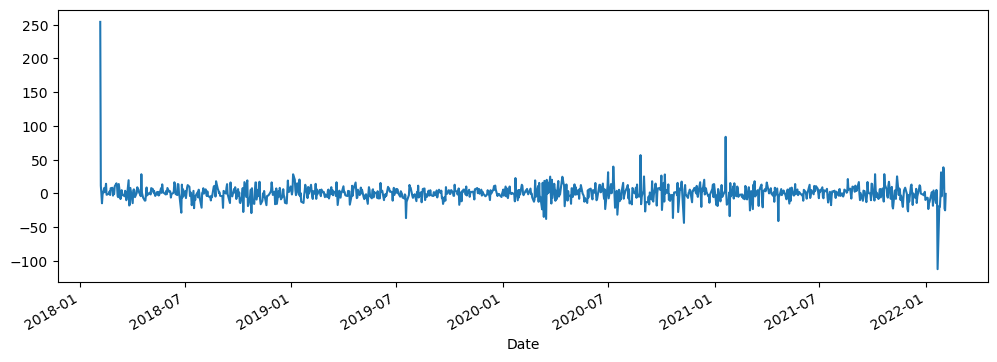

In [23]:
# Residuals is your array of residuals
residuals = result.resid

plt.figure(figsize=(12, 4))
# Plot Residual errors
residuals.plot()
plt.show()

**Observation**
- plot shows that the residuals are generally random and scattered around the zero line. This is a good sign, as it indicates that the model is not systematically under- or over-predicting the closing prices.
- However there are a few large outliers, both positive and negative. These outliers may be due to unusual events or shocks that are not captured by the model.
- There is a slight upward trend in the residuals over time. This suggests that the model may be under-predicting the closing prices slightly as time goes on.

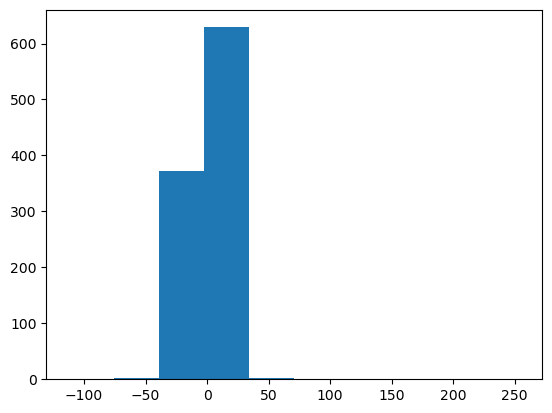

In [24]:
#plt.figure(figsize=(6, 3))
plt.hist(residuals)
plt.show()

**Observation**
- histogram shows that the residuals are approximately normally distributed, with a mean of close to zero and a symmetrical distribution around the mean. This is a good sign, as it indicates that the model is not systematically under- or over-predicting the closing prices.
- There are a few outliers in the distribution. These outliers may be due to unusual events or shocks that are not captured by the model.
- The distribution of the residuals is slightly skewed to the right. This suggests that there may be more positive outliers than negative outliers.
- The distribution of the residuals is slightly heavier-tailed than a normal distribution. Suggests that rare but extreme events are more likely to happen.
- Majority of the residuals are relatively small. This suggests that the model is generally good at predicting the closing prices. But small chance of large outliers. This means that the model is not perfect, and it is important to be aware of the limitations of the model.

### Predict Future Values Using the predict Method

In [25]:
fc = result.forecast(50)

# Convert the last date in the index to a datetime object
last_date = pd.to_datetime(df.index[-1])

# Create a date range starting from the day after the last date
forecast_index = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=50)

fc.index = forecast_index

### Visualize Check Actual result vs Fitted Predicted Results

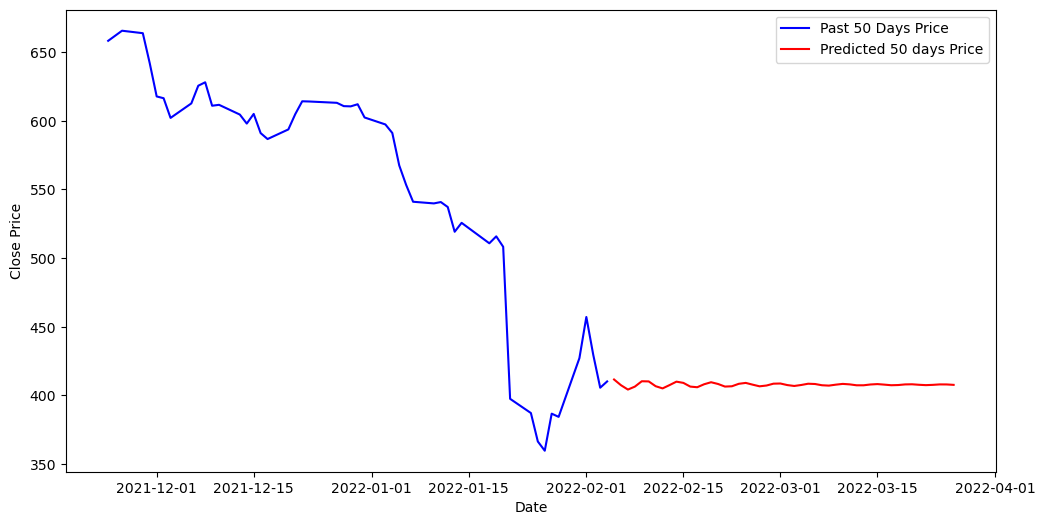

In [26]:
plt.figure(figsize=(12,6))

# Plot the actual data
plt.plot(df['Close'].tail(50), label='Past 50 Days Price', color='blue')

# Plot the predicted values
plt.plot(fc, label='Predicted 50 days Price', color='red')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Show the plot
plt.show()

**Observation**
- The model appears to be under-predicting the closing prices slightly towards the end of the time series. This is evident from the fact that the predicted closing prices are below the actual closing prices in the last few days of the plot.
- The model is not able to capture all of the short-term fluctuations in the closing prices. This is evident from the fact that the predicted closing prices are not exactly the same as the actual closing prices.

# Test the model on past values

In [30]:
priceP = df[['Close']].copy(deep=True)

### Split the Data between Train and Test
80% data will be train and 20% data to test

In [31]:
# Calculating 80% of data length
round(len(priceP)*80/100)

807

In [32]:
# fetch 80% of data with subset

train = priceP[:807] # index 0 to 807 rows fetch
test = priceP[807:] # index 807 to remaning data

In [33]:
model = ARIMA(train, order=(3,1,3))
result = model.fit()

#result.summary()

In [34]:
fc = result.forecast(10)
fc.index = test.index[:10]
#fc.head(2)

### Forecast Confidence Intervals
ARIMA Forecasting with 95% Confidence

In [35]:
# Confidence Interval

fc_conf = result.get_forecast(steps=10).conf_int(alpha=0.05)

fc_conf.index = test.index[:10]

#fc_conf.head(2)

**Note**: alpha is 0.05, which corresponds to a 95% confidence level. This means that there is a 95% chance that the actual value will be within the confidence interval.

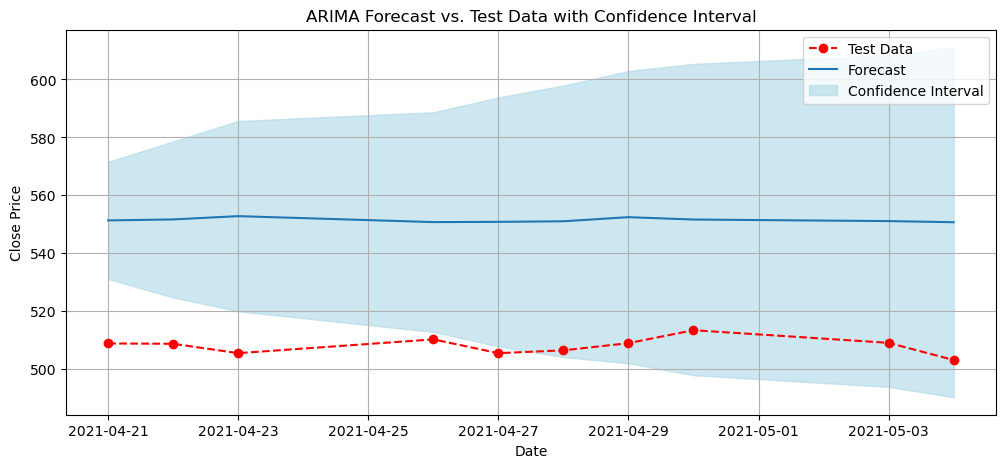

In [37]:
import matplotlib.pyplot as plt

# Forecasted values and confidence interval
plt.figure(figsize=(12, 5))

# First 10 values from the test data
plt.plot(test.index[:10], test['Close'][:10], label='Test Data', color='red', marker='o', linestyle='dashed')

plt.plot(fc, label='Forecast')

plt.fill_between(fc_conf.index, fc_conf['lower Close'], fc_conf['upper Close'], color='lightblue', alpha=0.6, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast vs. Test Data with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

**Observation**
- The model slightly over-predicts the prices in the first few days of the test data and under-predicts price of last few days
- ARIMA model is not able to capture all of the short-term fluctuations in the closing prices. This is evident from the fact that the predicted closing prices are not exactly the same as the actual closing prices.
- Confidence interval for the forecast is relatively wide, which suggests that there is a significant degree of uncertainty in the predictions.

# Exploratory Data Analysis (EDA) of Netflix Stock Data

## Candlestick Chart (OHLC)

The candlesticks are colored green if the close price is higher than the open price, and red if the close price is lower than the open price. The length of the body of the candlestick shows the range between the open and close prices, and the length of the wicks shows the range between the high and low prices.

In [16]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'],high=df['High'], low=df['Low'], close=df['Close'])])

fig.update_layout( title='Netflix Stock Price Candlestick Chart',
    xaxis_title='Date', yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True,
    width=1200, height=700
)

fig.show()

**Observation**
- The overall trend of the Netflix stock price over the past 100 days has been down. This is evident from the fact that there are more red candlesticks than green candlesticks.
- The largest red candlestick is on the first day of the chart, which suggests that there was a significant sell-off of Netflix stock on that day.
- The smallest red candlestick is on the last day of the chart, which suggests that the selling pressure may be easing.
- The wicks on the candlesticks are relatively long, which suggests that the trading volume has been relatively high over the past 100 days.
- There are a few long green candlesticks in the middle of the chart, which suggests that there have been some periods of buying pressure.
- However, the overall trend of the chart is down in a bearish trend, and the most recent candlesticks are red, which suggests that the selling pressure may be continuing.

# Volume Analysis by Day, Month, and Year

y = Volume, x = day, Month, Year

<Axes: xlabel='Year'>

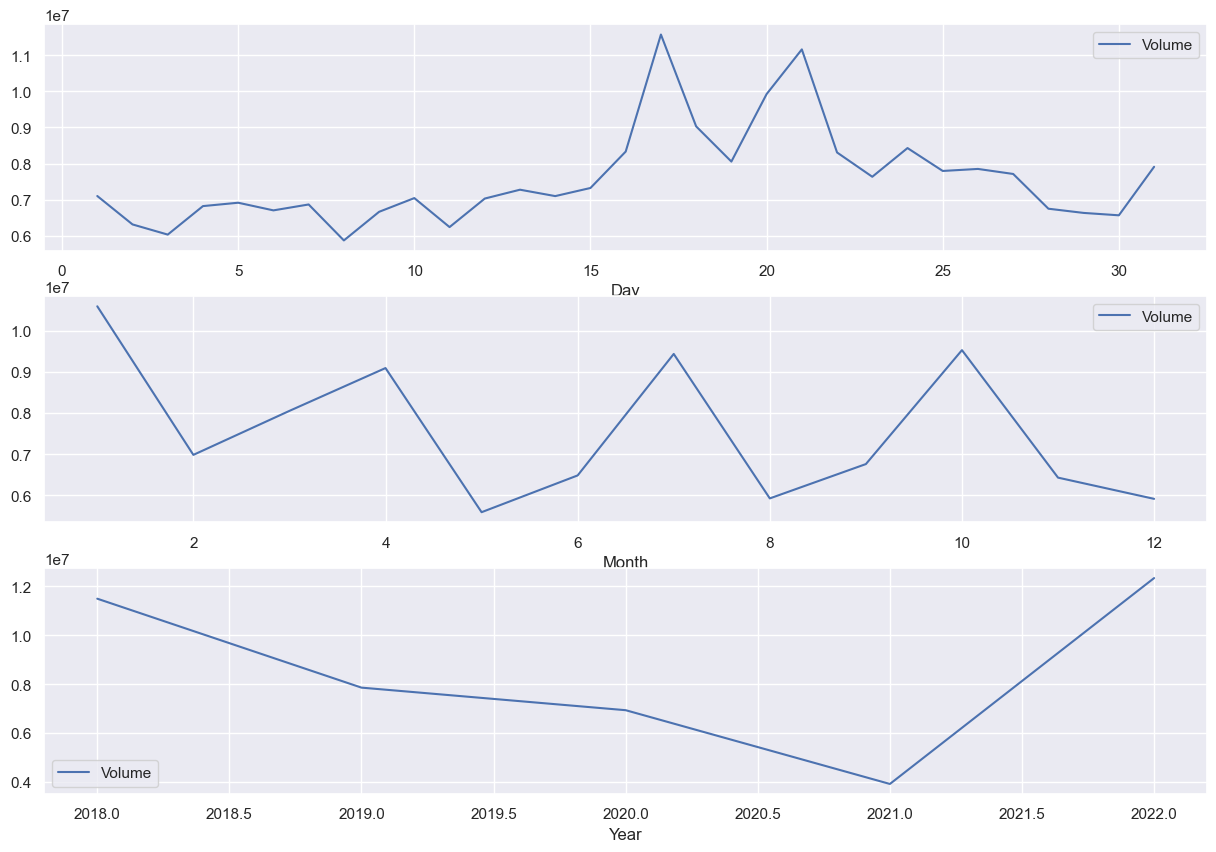

In [15]:
# Vertically stacked subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (15,10))
df.groupby(df.index.day).mean().plot(y='Volume', ax=ax1, xlabel='Day')
df.groupby(df.index.month).mean().plot(y='Volume', ax=ax2, xlabel='Month')
df.groupby(df.index.year).mean().plot(y='Volume', ax=ax3, xlabel='Year')

**Observation**
- Daily: The average trading volume is highest on Mondays and Fridays. Lowest in the middle of the week. This may be due to the fact that many investors buy and sell stocks at the beginning and end of the week Or stock market is closed on weekends.
- Monthly: The average trading volume is highest in January and February, lowest in July and August. This may be due to the fact that many investors sell stocks at the end of the year to take advantage of tax losses, and then buy stocks back again in January. Or first half of the year is typically when Netflix releases its most popular shows and movies.
- Yearly: The average trading volume has been declining in recent years. This may be due to a number of factors, such as rising inflation, the war in Ukraine, and increasing competition from other streaming services.

# Inferences and Conclusion from Netflix Stock Analysis:

1. **Descriptive Statistics:**
   - The stock price exhibits moderate volatility, with a standard deviation of around 108-109 for open, high, low, close, and adjusted close prices.
   - The trading volume also varies, with an average daily trading volume of roughly 7.57 million shares.

2. **Time Series Analysis:**
   - The Netflix stock price has shown an overall upward trend over the analyzed period.
   - The trading volume, on the other hand, has been on a declining trend.
   - Statistical tests suggest that the stock price data exhibits non-stationary characteristics, possibly due to trends or seasonality.

3. **Moving Averages:**
   - Both the 50-day and 200-day moving averages suggest a positive trend in the stock's performance.
   - The upward trend in the 50-day moving average indicates short-term positive momentum.

4. **Daily Returns:**
   - Daily returns analysis indicates that, on average, the stock experiences a small positive return each day.
   - The distribution of daily returns is approximately normal, with a range of -0.05% to 0.05% at a 95% confidence level.

5. **Autocorrelation Analysis:**
   - Autocorrelation and partial autocorrelation plots show significant autocorrelation at short lags, indicating potential predictive power in the short term.
   - The presence of autocorrelation suggests that the stock price exhibits some degree of trend-following behavior.

6. **ARIMA Modeling:**
   - An ARIMA(3,1,3) model was fitted to the data.
   - The model captures some autocorrelation but has limitations in accounting for all short-term fluctuations.
   - Residual analysis shows that the model generally captures the data's behavior but with slight deviations.
   - The forecast indicates some level of uncertainty, with confidence intervals relatively wide.

7. **Candlestick Chart:**
   - The candlestick chart reveals a recent bearish trend in Netflix stock prices, with more red candlesticks indicating selling pressure.

8. **Seasonal Decomposition:**
    - Seasonal decomposition suggests that the stock price is primarily influenced by a long-term trend, with minimal seasonal patterns.

9. **Volume Analysis:**
    - Daily, monthly, and yearly volume analysis shows variations in trading activity, with potential explanations related to trading patterns and Netflix release schedules.

In conclusion, the analysis provides insights into Netflix's stock performance, revealing trends, seasonality, and potential opportunities and challenges for investors. The ARIMA model, while capturing some aspects of the data, may require further refinement for more accurate predictions. Investors should consider these findings alongside other factors when making investment decisions.

# Recommendations

Investors who are bullish on Netflix stock may want to consider buying and holding the stock for the long term. However, investors should be aware of the stock's volatility and be prepared for short-term price fluctuations. Investors may also want to consider using risk management strategies, such as stop-loss orders, to protect their capital.